<a href="https://colab.research.google.com/github/dhenifferraujo/ImageProcessing_SCC5830-2021/blob/main/Projeto_Final/codes/Bars_detections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#Importação das bibliotecas necessárias
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
from tensorflow import keras

Download das imagens para testes usando o utilitário do keras

In [51]:
imgs_path = keras.utils.get_file("in.zip","https://drive.google.com/u/1/uc?id=19SIVBvyxMmM6F7zDEcdWn5dt-8OBSzAE&export=download", extract=True)
str_path = imgs_path.replace('.zip', '/*')

Após as imagens serem convertidas em escala de cinza. Aplicamos os métodos morfológicos erode() e dilate() (erosão e dilatação). Usamos esses métodos para remover ruídos das imagens.

In [49]:
# Definição da função morfológica
def morph_function(matinput):
  kernel =  cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

  morph = cv2.erode(matinput,kernel,iterations=1)
  morph = cv2.dilate(morph,kernel,iterations=2)
  morph = cv2.erode(matinput,kernel,iterations=1)
  morph = cv2.dilate(morph,kernel,iterations=1)

  return morph

Após as imagens serem segmentadas, aplicamos o método findCountours() para encontrar os contornos. Ou seja, encontrar as barras pretas em um fundo branco.
Criamos um laço de repetição para percorrer e contar todos os contornos em forma de retângulo encontrados. Para isso, foi levado em consideração a distância e ângulo em que a imagem foi capturada. Obs: os valores definidos na função para a barra a ser encontrada são uma área entre 1000 a 4000, com proporção de preenchimento entre 9 a 14.5.

In [56]:
# Análise das características
def analyze_bars(matblobs,countours_frame, file):

  blobs,_ = cv2.findContours(matblobs,cv2.RETR_LIST ,cv2.CHAIN_APPROX_SIMPLE)
  valid_bars = []

  for i,bar in enumerate(blobs):
    rot_rect = cv2.minAreaRect(bar)
    b_rect = cv2.boundingRect(bar)

    (cx,cy),(sw,sh),angle = rot_rect
    rx,ry,rw,rh = b_rect

    box = cv2.boxPoints(rot_rect)
    box = np.int0(box)

    # Desenhando o contorno da área da barra encontrada
    frame = cv2.drawContours(countours_frame,[box],0,(0,255,0),1)

    on_count = cv2.contourArea(bar)
    total_count = sw*sh
    if total_count <= 0:
      continue

    if sh > sw :
      temp = sw
      sw = sh
      sh = temp


    # Área mínima 
    if sw * sh < 1000:
      continue

    # Área máxima
    if sw * sh > 4000:
      continue  

    #print('Area: ', sw * sh)

    # Proporção da barra
    rect_ratio = sw / sh

    #print('rect_ratio:', rect_ratio)

    if rect_ratio <= 9 or rect_ratio >= 14.5:

      continue

    # Desenhando o contorno da área da barra encontrada
    #frame = cv2.drawContours(countours_frame,[box],0,(0,0,255),1)

    # Proporção do preenchimento
    fill_ratio = on_count / total_count
    #print('fill_ratio: ', fill_ratio)

    if fill_ratio < 0.7 :
      continue

    #print('countours_frame[int(cy),int(cx),0] ->', countours_frame[int(cy),int(cx),0])
    # Remove as barras que são mais claras
    if countours_frame[int(cy),int(cx),0] > 200:
      continue

    valid_bars.append(bar)

  if valid_bars:
    print("O Arquivo {}, possui um total de {} linhas pretas".format(os.path.basename(file), len(valid_bars)))
  
  #print('-----fim --> ', format(os.path.basename(file)), '\n\n')
  # cv2.imshow("countours_frame_in",countours_frame)
  # cv2.waitKey(1)

  return valid_bars


Utilizamos o método threshold() com binarização de Otsu para segmentar as imagens, ou seja, aplicar o limite (limiar). Optamos por usar a binarização de Otsu porque estamos trabalhando com imagens bimodais.

O Arquivo teste05.jpeg, possui um total de 17 linhas pretas


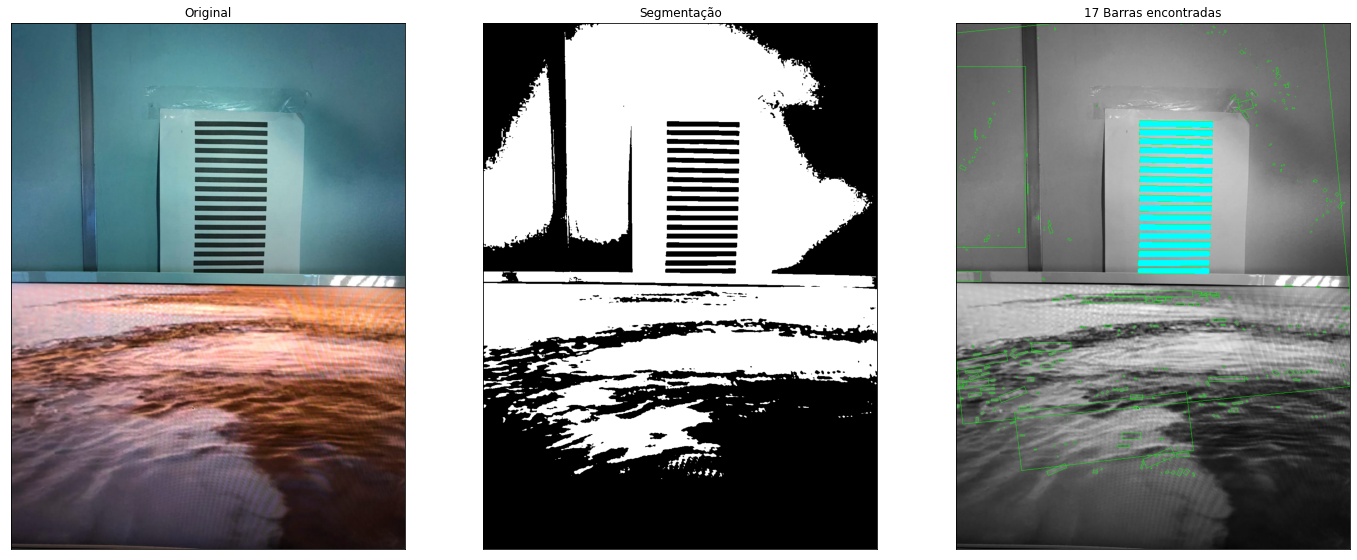


O Arquivo teste08.jpeg, possui um total de 4 linhas pretas


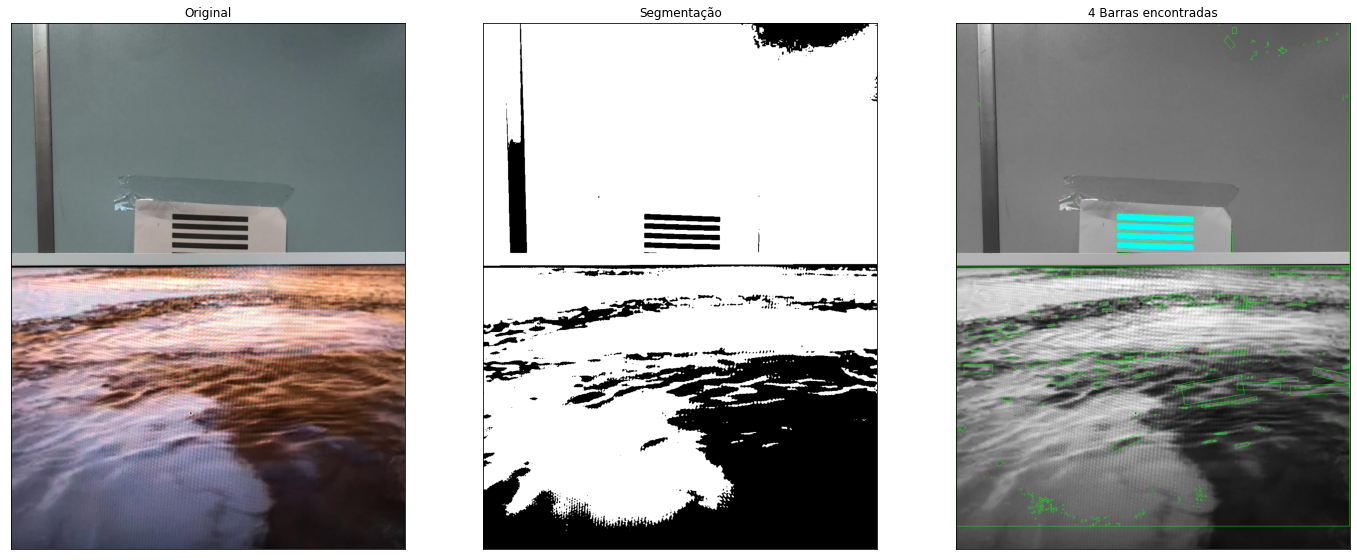


O Arquivo teste04.jpeg, possui um total de 16 linhas pretas


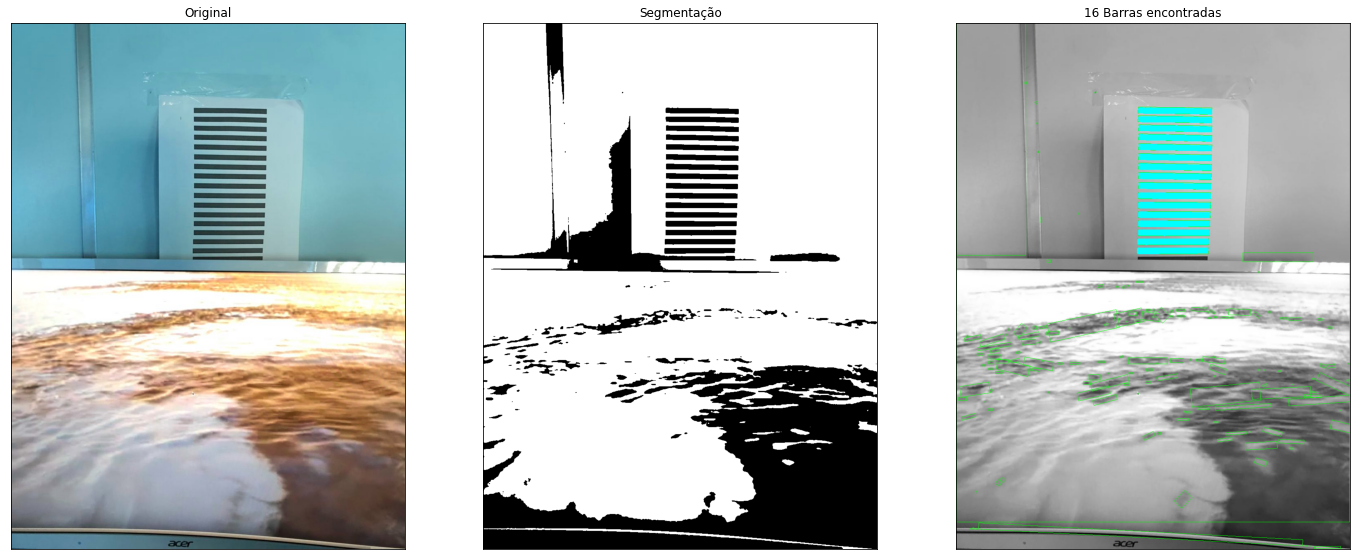


O Arquivo teste09.jpeg, possui um total de 16 linhas pretas


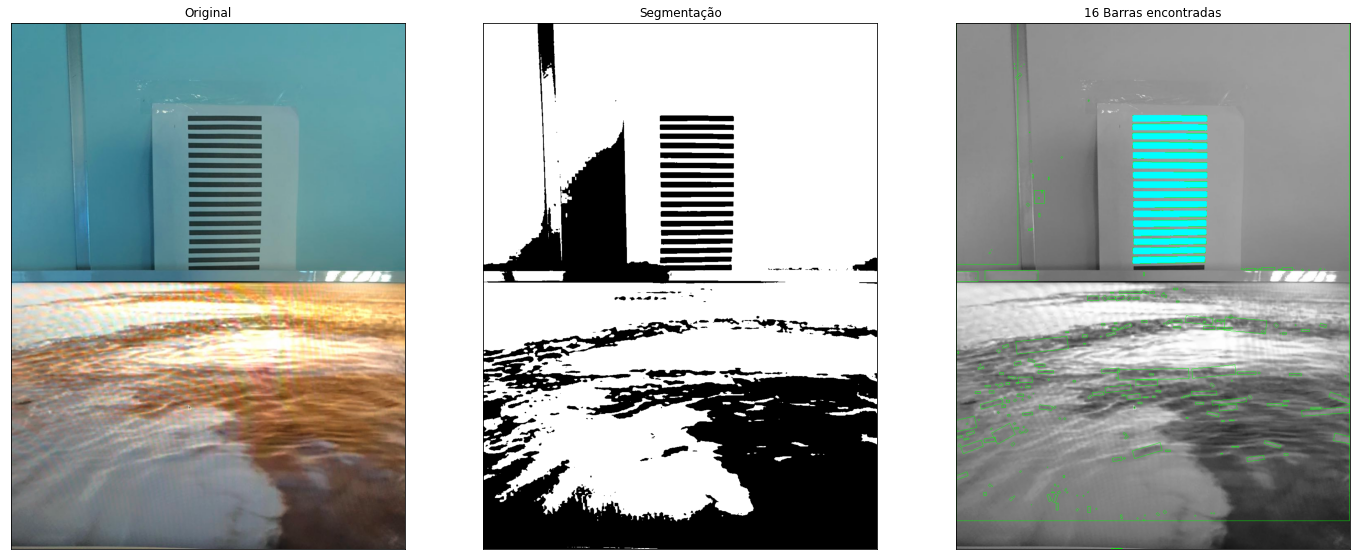


O Arquivo teste03.jpeg, possui um total de 16 linhas pretas


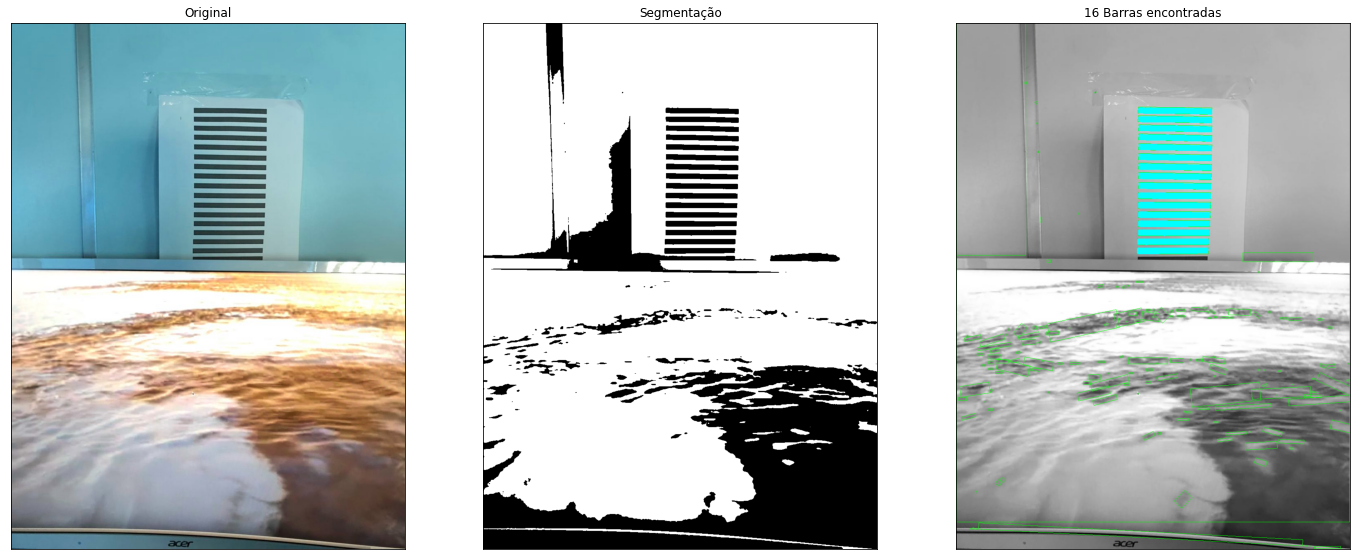


O Arquivo teste06.jpeg, possui um total de 7 linhas pretas


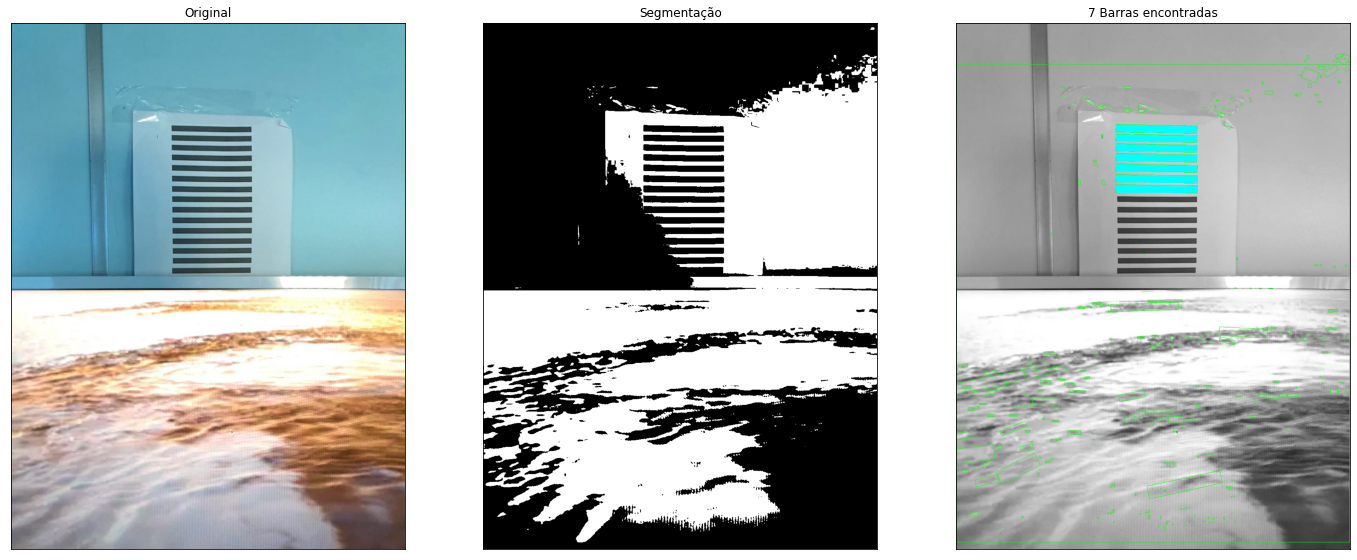


O Arquivo teste01.jpeg, possui um total de 5 linhas pretas


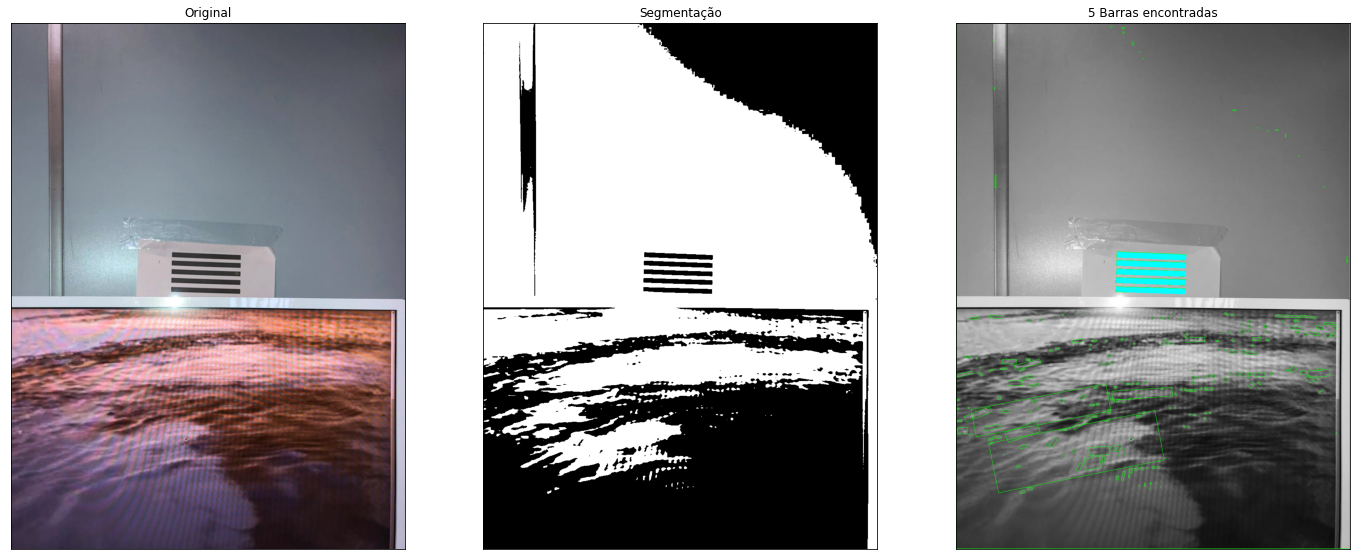


O Arquivo teste10.jpeg, possui um total de 13 linhas pretas


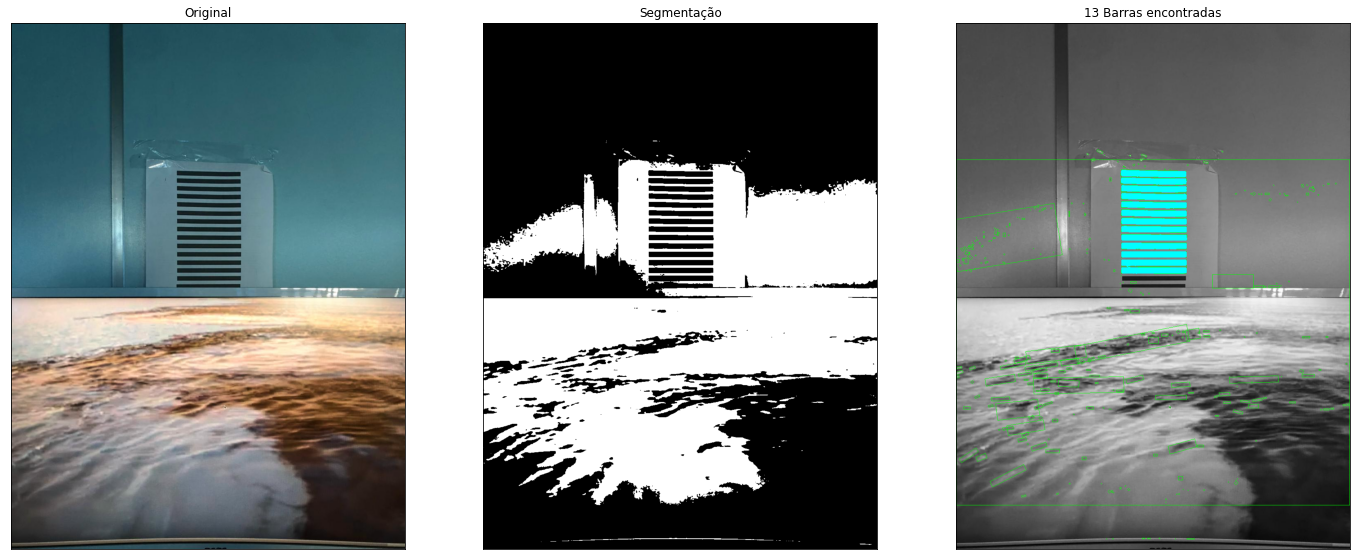


O Arquivo teste11.jpeg, possui um total de 5 linhas pretas


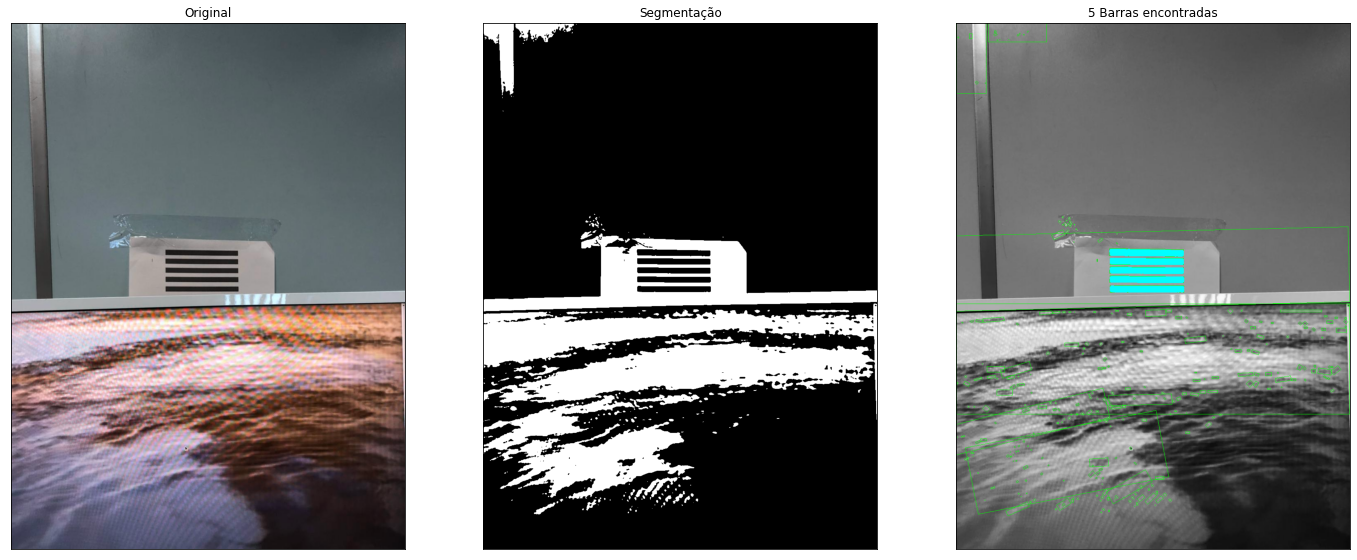


O Arquivo teste02.jpeg, possui um total de 40 linhas pretas


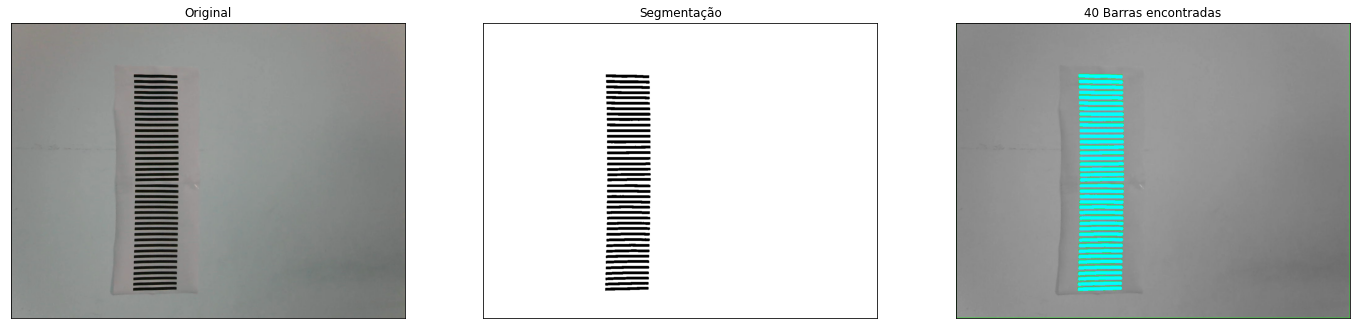


O Arquivo teste07.jpeg, possui um total de 16 linhas pretas


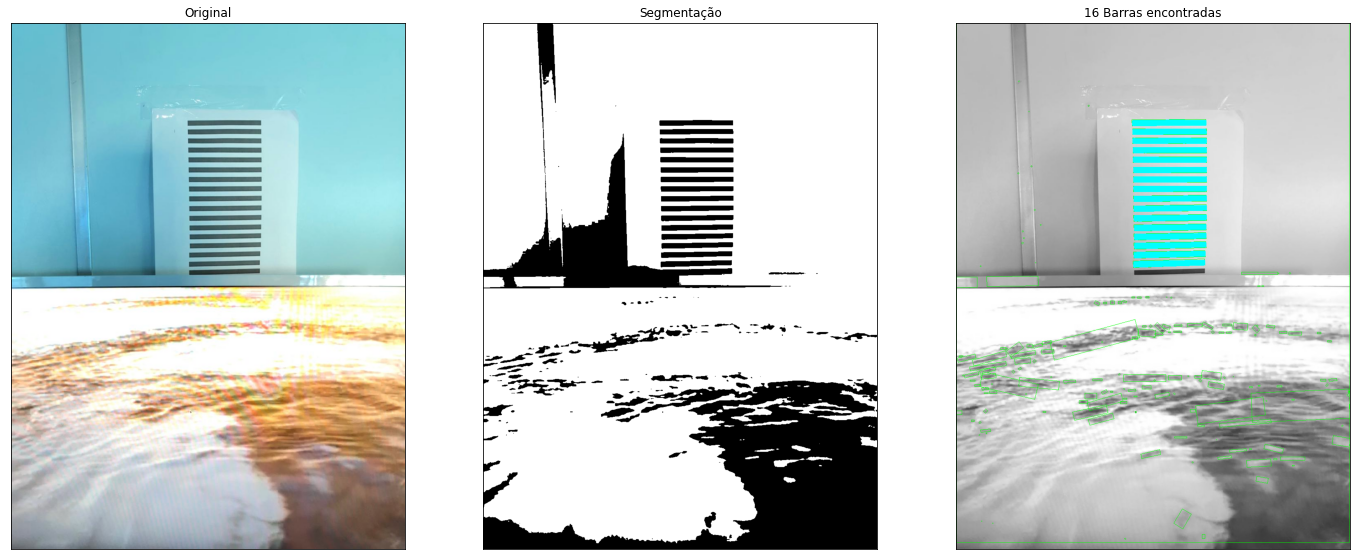

In [60]:

for file in glob.glob(str_path):

  img = cv2.imread(file) 
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

  # Função Gaussiana para adicionar ruído (blur)
  blurred = cv2.GaussianBlur(gray,(3,3),-1)
  
  # Aplicando a técnica 'thresholding Otsu'
  # Extrair a característica da binarização da imagem
  # Otsu thresholding     
  ret, thresh1 = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  
  # cv2.imshow("thresholding",thresh1)
  # cv2.waitKey(1)

  matmorph = morph_function(thresh1)
  # cv2.imshow("matmorph",matmorph)
  # cv2.waitKey(1)

  img_with_bars = cv2.cvtColor(gray,cv2.COLOR_GRAY2BGR)
  valid_bars = analyze_bars(matmorph,img_with_bars, file)

  # Pinta as barras encontradas
  for b in range(len(valid_bars)):
    cv2.drawContours(img_with_bars,valid_bars,b,(0,255,255),-1)

  # cv2.imshow("img_with_bars",img_with_bars)
  # cv2.imwrite('../imgs/out/saida7.png', img_with_bars)
  # cv2.waitKey(0)


  
  plt.figure(figsize=(24,12))
  plt.subplot(131),plt.imshow(img, cmap = 'gray')
  plt.title('Original'), plt.xticks([]), plt.yticks([])

  plt.subplot(132),plt.imshow(thresh1,cmap = 'gray')
  plt.title('Segmentação'), plt.xticks([]), plt.yticks([])

  plt.subplot(133),plt.imshow(img_with_bars,cmap = 'gray')
  plt.title(str(len(valid_bars))+' Barras encontradas'), plt.xticks([]), plt.yticks([])
  plt.show()

  print('')


